# Phasors, Power Definitions

`````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
        
<img src="./lec3/Slide3.PNG" align="left" width="62%">

Welcome to the 2nd module of the course. Now we move on to study the method to calculate power using phasors and the three phase system. 

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide4.PNG" align="left" width="62%">

Let's use the electric car powertrain to show what we will learn in this module. After taking the module, we should be able to do relevant calculations between the inverter and the machine -- three phase AC systems, as shown in this slide.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide5.PNG" align="left" width="62%">

Here it shows the content of this lecture. We will go one step further from sinusoidal waveforms to those with harmonics (non-sinusoidal), followed by instantaneous power calculation and cost of electricity.

Then we review the application of phasors and use them to calculate the complex power and the power factor. A few examples will be used in the end of the lecture to show how calculations can be done.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide6.PNG" align="left" width="62%">

After taking this lecture, you are supposed to master the objectives listed here. They are very important since we will use these calculation skills constantly in power conversion applications.
```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide7.PNG" align="left" width="62%">

So in the coming lectures of this module, we will learn how do we analyse, optimise and invoice the electrical power system.
```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide8.PNG" align="left" width="62%">

In conventional power systems, the voltage and current waveforms are always sinusoidal. The generator is designed in a way to generate voltages as sinusoidal as possible. The transmission lines, transformers and loads can be treated as linear components -- which means they do not alter the shape of the waveforms.

But the scenario is changing nowadays.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide9.PNG" align="left" width="62%">

As more and more renewable sources are included, batteries and power electronics converters are used in the power system, we have to deal with DC waveforms and non-sinusoidal waveforms as well. The reason is power electronics converters are not linear impedances anymore. There will be non-sinusoidal current waveform even if they are fed with sinusoidal voltages, e.g., a [diode rectifier](https://www.ipes.ethz.ch/mod/lesson/view.php?id=3&pageid=12) feeding a battery introduces significant non-sinusoidal currents.

This is already happening and there will be more DC and non-sinusoidal waveforms in the future power system.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide10.PNG" align="left" width="62%">

We are also encountering DC and non-sinusoidal waveforms in small power systems other than the power grid, e.g. in electric vehicles.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide11.PNG" align="left" width="62%">

So in this module, we will follow the sequence as shown in the slide. We start with the basics, then apply them in the classic system and discuss about the effect of non-sinusoidal waveforms in modern and future power systems.
        
```
`````

(power_single_phase)=
## Instantaneous power, average power and energy

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide12.PNG" align="left" width="62%">

Let's start with the simplest case to refresh our knowledge on power calculation. This slide shows a sinusoidal voltage feeding a purely resistive load. The instantaneous power calculation is shown in the slide. Below you can find the derivation in Python.
```

````

In [1]:
from sympy import *

v_r, V_m, t, i_r, R = symbols('v_r, V_m, t, i_r, R', isreal=True)
omega = Symbol('omega', nonzero=True) # non-DC

v_r = V_m*sin(omega*t) # input voltage
i_r = v_r/R            # current through resistor
p_t = v_r*i_r


print('The instantaneous power is:')
p_t

The instantaneous power is:


V_m**2*sin(omega*t)**2/R

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide13.PNG" align="left" width="62%">

By integrating the instantaneous power and taking the average, we are able to obtain the average power.
````

In [2]:
# solve for average power
T = 2*pi/omega # period
p_av = 1/T*integrate(p_t, (t, 0, T))

print('The average power is:')
p_av

The average power is:


V_m**2/(2*R)

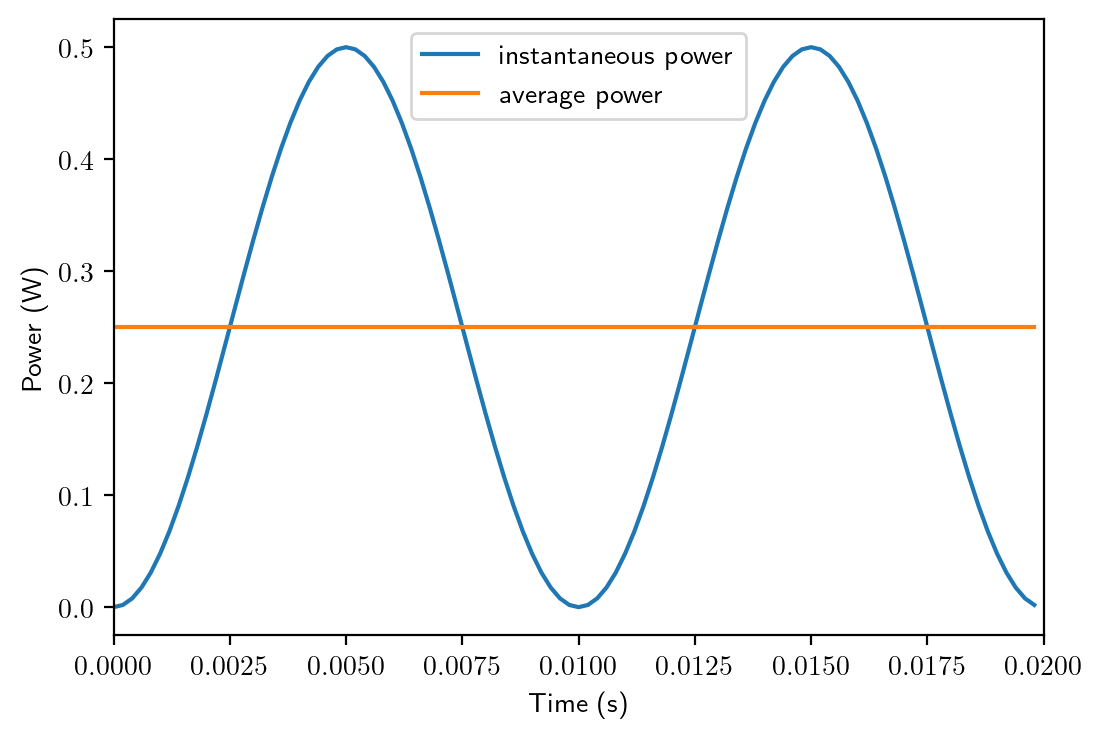

In [3]:
# An numerical example

# 230*sqrt(2) V, (230)^2*4 Ohm, 50 Hz case, plot the waveform
import numpy as np;

p_t_fun = p_t.subs({V_m:230.0*sqrt(2.0), omega:2*pi*50.0, R:(230)**2*4})
t_num   = np.arange(0, 1/50, 1/50/100)
p_t_lam = lambdify(t, p_t_fun, "numpy")
p_t_num  = p_t_lam(t_num)

p_av_num = float(p_av.evalf(subs={V_m:230.0*sqrt(2.0), R:(230)**2*4}))

import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6 , 4]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

plt.plot(t_num, p_t_num, label='instantaneous power')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.plot(t_num, np.ones_like(t_num)*p_av_num, label='average power')
plt.xlim([0, 0.02])
plt.legend()
plt.show()

`````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide14.PNG" align="left" width="62%">

From the  calculation of the average power above, we can see the sinusoidal AC voltage with an amplitude of $V_m$ supplying a resistance $R$ delivers the same power as a DC voltage $V_m/\sqrt{2}$ feeding the same resistance. This equivalent DC voltage is called the effective value of the AC voltage. The effective value of the AC sinusoidal quantity is also called the Root-Mean-Square (rms) value of the AC sinusoidal quantity.

The derivation is given in Python code below.
```

`````

In [4]:
v_eff = sqrt(integrate(v_r**2, (t, 0, T))/T)
print('The effective value of the AC voltage is:')
v_eff

The effective value of the AC voltage is:


sqrt(2)*sqrt(V_m**2)/2

`````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide15.PNG" align="left" width="62%">

Similarly, the rms value of the sinusoidal current can be derived in the same way, as shown in the derivation on this slide.
```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide16.PNG" align="left" width="62%">

Now let's see how to calculate the power in a three phase power system.
In a three phase system, the three phase voltages are all sinusoidal waveforms, but has an equal phase shift between them. Since there
is $2\pi$ radians in a full circle, to have an equal phase shift between all three the voltages, we will need a $2\pi/3$ radian phase shift between each of the voltages, as shown in the equations and the waveforms on this page, where $f$ is the frequency of the waveform in Hz.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide17.PNG" align="left" width="62%">

For each phase, we are able to calculate the power delivered in each phase. We will see that the three phase power results have a common DC part $V^2/R$, and time varying parts which have an equal phase shift of $2\pi/3$ between them. Here $V$ is the effective or the rms voltage of each phase. Apparently, the time varying parts will cancel each other. In the end, the total power becomes a constant. 

The derivation is shown in the Python code below.
```

`````

In [5]:
# Symbolic derivation of three phase power
V, f = symbols('V, f')
## Three phase voltage
v_a  = sqrt(2)*V*cos(2*pi*f*t)
v_b  = sqrt(2)*V*cos(2*pi*f*t+2*pi/3)
v_c  = sqrt(2)*V*cos(2*pi*f*t-2*pi/3)
## three phase power
p_a  = v_a**2/R
p_b  = v_b**2/R
p_c  = v_c**2/R
## Total power
p_total = p_a+p_b+p_c
p_total = simplify(p_total)

print('The total three phase power is:')
p_total

The total three phase power is:


3*V**2/R

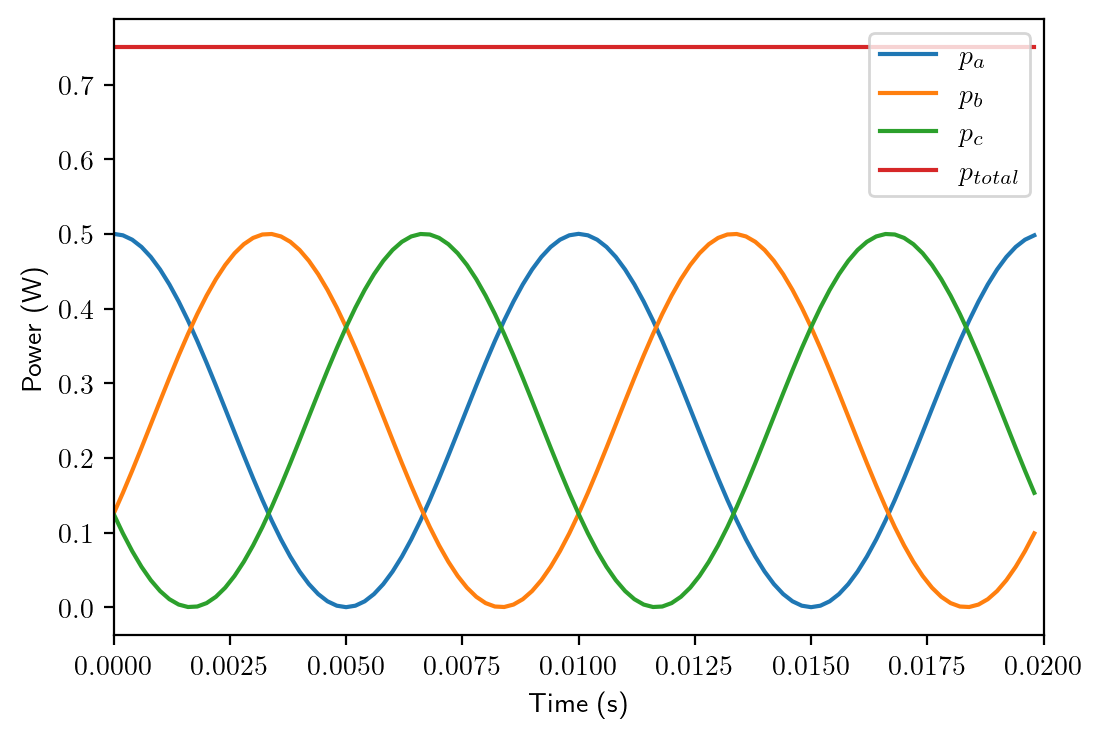

In [6]:
p_a_fun = p_a.subs({V:230.0, f:50.0, R:(230)**2*4})
p_b_fun = p_b.subs({V:230.0, f:50.0, R:(230)**2*4})
p_c_fun = p_c.subs({V:230.0, f:50.0, R:(230)**2*4})

p_a_lam = lambdify(t, p_a_fun, "numpy")
p_b_lam = lambdify(t, p_b_fun, "numpy")
p_c_lam = lambdify(t, p_c_fun, "numpy")

p_a_num  = p_a_lam(t_num)
p_b_num  = p_b_lam(t_num)
p_c_num  = p_c_lam(t_num)


plt.plot(t_num, p_a_num,label='$p_a$')
plt.plot(t_num, p_b_num,label='$p_b$')
plt.plot(t_num, p_c_num,label='$p_c$')
plt.plot(t_num, p_a_num+p_b_num+p_c_num,label='$p_{total}$')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.xlim([0, 0.02])
plt.legend()
plt.show()

```{note}
Beware of the difference between the amplitude and the rms values in the calculation.
```

`````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide18.PNG" align="left" width="62%">

Having known the method to calculate the power in single and three phases, let's check how to invoice the electrical energy.

Since energy is calculated as the time integral of the power, the unit of it would be [watt-second], or Joule [J]. However, the unit of J is too small. We have to deal with very large numbers if we use it directly to calculate the energy cost. In practice, we use kilowatt-hour [kWh] more often, as defined in the slide.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide19.PNG" align="left" width="62%">

This slide shows the household electricity price in Euro Cents per kWh of various European countries in 2019. But please be aware that nowadays the fluctuating electricity price is used, which is determined by the supply and demand of electricity. For example, we have off-peak and peak hour electricity tariffs here in the Netherlands.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide20.PNG" align="left" width="62%">

Now please review the example on this slide to practice the electricity cost calculation. We have to convert the energy expressed in J to kWh for the final cost. You may use the Python script below to check your answer.
```

`````

In [7]:
rho = 1000 # water density, kg/m^3
h_spec = 4183 # specific heat, J/kg/K
c_kWh  = 0.21 # cost per kWh
t_shower = 3.4 # min of shower each day
flow_rate = 10.0/1000 # m^3/min flow rate of shower

# First calculate the bath energy and cost
V_b = 80.0/1000 # volume of bath in m^3
dT  = 42.0-13.0 # temperature rise
cost_b = dT*V_b*h_spec*rho/(1000.0*60.0*60.0)*c_kWh*30 # 30 days per month

# cost shower
V_s = t_shower*flow_rate # volume of bath in m^3
dT  = 42.0-13.0 # temperature rise
cost_s = dT*V_s*h_spec*rho/(1000.0*60.0*60.0)*c_kWh*30 # 30 days per month

print('The price of the bath is: {:.2f} Euros'.format(cost_b))
print('The price of the shower is: {:.2f} Euros'.format(cost_s))
print('The difference in cost is: {:.2f} Euros'.format(cost_b-cost_s))

The price of the bath is: 16.98 Euros
The price of the shower is: 7.22 Euros
The difference in cost is: 9.77 Euros


(complex_power)=
## Phasors, complex power and power factor correction

`````{grid}
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide21.PNG" align="left" width="62%">

The second part of the lecture will deal with phasors, which we have learned in previous courses. 

````

````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide22.PNG" align="left" width="62%">

Let's first review the definition of a phasor, which is contracted from "phase vector".
A sinusoidal signal is able to be described by its amplitude ($\hat{a}$), its frequency ($\omega$) and the phase shift ($\alpha$), as shown here. In ac power system analysis, the frequency is normally implicit to the problem at hand and it does not vary. Therefore, several signals in the same system can be described uniquely using only the amplitude and the phase shift as descriptors. Recall Euler's equation:

$
e^{j\omega t} = \cos(\omega t) + j \sin(\omega t)
$

We are able to write the original sinusoidal equation in the form of the real part of a complex number, as shown on the slide.

Therefore, by taking the frequency of the system as a constant and implicit to the circuit at hand, it is possible to describe any sinusoidal signal using only its amplitude and phase as descriptions. This description is called a phasor and takes the shorthand form of $A\angle\alpha$.
Formally this shorthand form is called the [Steinmetz](https://en.wikipedia.org/wiki/Charles_Proteus_Steinmetz) notation named after the German-American engineer who devised this method of solving ac circuits using complex numbers. We can also show the phasor graphically in the complex domain as shown on the slide.

Although phasor is widely used in electrical engineering, in most cases it is not completely defined. The
definition used in this course is as follows:

```{admonition} Phasor definition
:class: note

A phasor is a complex quantity associated with a phase-shifted cosine wave such that, if the phasor is in polar form, its magnitude is the effective (rms) value of the voltage or current and its angle is the phase angle of the phase-shifted cosine wave. Therefore $A\angle{\theta} = \sqrt{2}A\cos(\omega t+\theta)$.

```

Note in some other textbooks, they may use amplitudes instead of rms values to define the phasor.
````

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide23.PNG" align="left" width="62%">

Here it shows the RMS notation we follow in this course. We will use either bold symbols $\textbf{V}$  or underlined symbols $\underline{V}$ to represent the phasor.
```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide24.PNG" align="left" width="62%">

Now if describe the three phase voltage using phasors, it becomes more compact. The graphical representation shows the equal phase shift of $2\pi/3$ between them.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide25.PNG" align="left" width="62%">

Using phasors, we are able to simplify our AC circuit analysis and calculation. Let's look at the example here. In order to solve for the current, we should first get the complex impedance, then divide the voltage phasor by it. Actually we can directly see the right choice is B without calculation, since the load is inductive, the current should be lagging the voltage. Anyway, an exact solution is given in the Python code below.

```
`````

In [8]:
%reset -f
import cmath
import math
from IPython.display import display, Markdown, Math, Latex

V = 26.0/math.sqrt(2) # rms voltage
omega = 50 # Ac angular frequency
phi_v = 0 # phase angle of voltage

R = 12.0
L = 0.1

V_ph   = cmath.rect(V, phi_v) # phasor of voltage
Z_load = R+omega*L*1j

I_ph   = V_ph/Z_load
display(Math('$\mathbf{{I}}={:.2f}\\angle{:.2f}^\circ$'.format(abs(I_ph), cmath.phase(I_ph)/math.pi*180)))

<IPython.core.display.Math object>

`````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide26.PNG" align="left" width="62%">

A more complicated example is shown here.
To solve the current we have to first obtain the total impedance, using the series/parallel connections. The code for calculation is available below.

```
`````

In [9]:
V = 20.0/math.sqrt(2) # rms voltage
phi_v = 0 # phase angle of voltage

Rs = 2
ZL = 1j*10.0
ZR = 8
ZZ = cmath.rect(12, 32/180*math.pi)

V_ph   = cmath.rect(V, phi_v) # phasor of voltage
Z_tot  = Rs + (1/ZL+1/ZR+1/ZZ)**(-1)
I_s    = V_ph/Z_tot
V_p    = V_ph - I_s*Rs   # voltage across the parallel branches

I_L    = V_p/ZL
I_r    = V_p/ZR
I_Z    = V_p/ZZ

I_ph   = V_ph/Z_load
display(Math('$\mathbf{{I_s}}={:.2f}\\angle{:.2f}^\circ$'.format(abs(I_s), cmath.phase(I_s)/math.pi*180)))
display(Math('$\mathbf{{I_L}}={:.2f}\\angle{:.2f}^\circ$'.format(abs(I_L), cmath.phase(I_L)/math.pi*180)))
display(Math('$\mathbf{{I_r}}={:.2f}\\angle{:.2f}^\circ$'.format(abs(I_r), cmath.phase(I_r)/math.pi*180)))
display(Math('$\mathbf{{I_Z}}={:.2f}\\angle{:.2f}^\circ$'.format(abs(I_Z), cmath.phase(I_Z)/math.pi*180)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

`````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide27.PNG" align="left" width="62%">

As you can see, we are able to add the phasors graphically in the complex domain.

```
`````

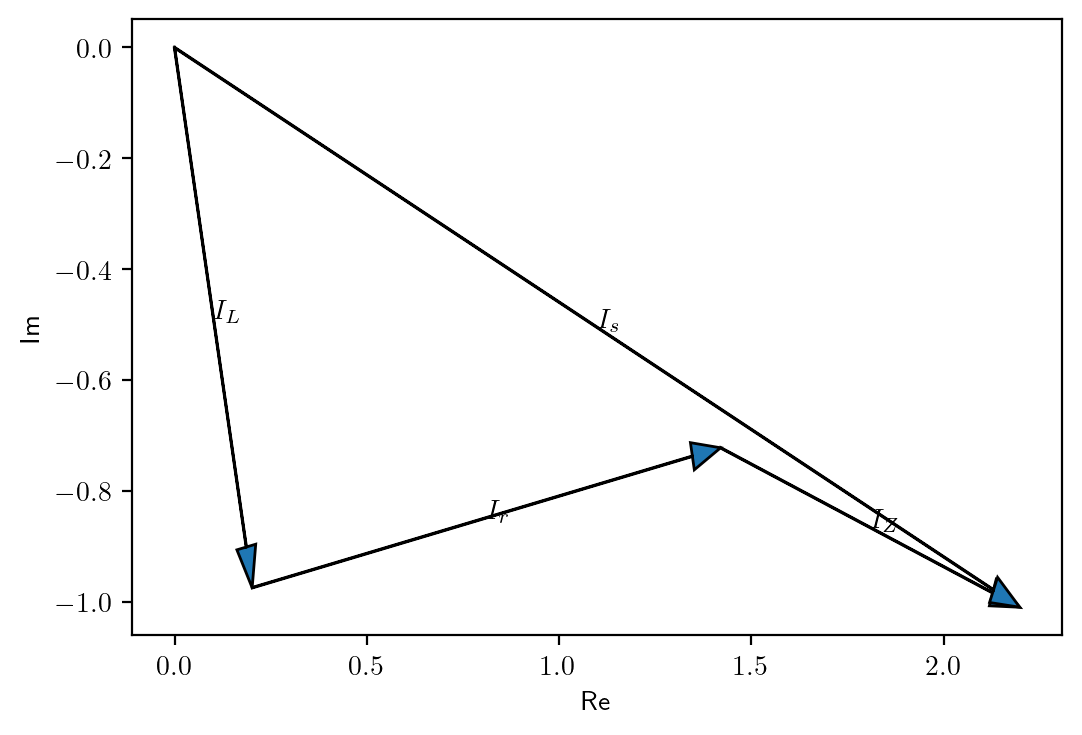

In [10]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6 , 4]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

plt.arrow(0, 0, I_L.real, I_L.imag, head_width=0.05, length_includes_head=True, label='I_L')
plt.annotate(r'$I_L$', (I_L.real/2, I_L.imag/2))
plt.arrow(I_L.real, I_L.imag, I_r.real, I_r.imag, head_width=0.05, length_includes_head=True)
plt.annotate(r'$I_r$', (I_L.real+I_r.real/2, I_L.imag+I_r.imag/2))
plt.arrow(I_L.real+I_r.real, I_L.imag+I_r.imag, I_Z.real, I_Z.imag, head_width=0.05, length_includes_head=True)
plt.annotate(r'$I_Z$', (I_L.real+I_r.real+I_Z.real/2, I_L.imag+I_r.imag+I_Z.imag/2))
plt.arrow(0, 0, I_s.real, I_s.imag, head_width=0.05, length_includes_head=True)
plt.annotate(r'$I_s$', (I_s.real/2, I_s.imag/2))
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

`````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide28.PNG" align="left" width="62%">

We have studied the power calculation of a single phase sinusoidal voltage feeding a resistive load. Now let's look at the general case: the power produced by the sinusoidal voltage and an arbitrary impedance. In such a case, the phase angle of the current would be depending on the type of load.

By using the trigonometric identity

$$
\sin(\alpha)\sin(\beta) = \frac{\cos(\alpha-\beta)-\cos(\alpha+\beta)}{2}
$$

we can derive the instantaneous power expression as shown on the slide. It has a constant item and a time varying item. The average power can again be found as (and realising that the integral of a
sinusoid over a period is equal to zero) to be the constant part only.

As we can see, the averaged power is exactly the product of the rms values of the current and the voltage.
```

`````

In [11]:
%reset -f
from sympy import *
from IPython.display import display, Markdown, Math, Latex


# Symbolic derivation of arbitary sinusoidal voltage/current
V_m, I_m, t, theta_v, theta_i = symbols('V_m, I_m, t, theta_v, theta_i')
omega = Symbol('omega', nonzero=True) # non-DC

## phase voltage
v_t = V_m*sin(omega*t+theta_v)
i_t = I_m*sin(omega*t+theta_i)

## instantaneous phase power
p_t = v_t*i_t

## average power
T = 2*pi/omega
p_av = (1/T)*integrate(p_t,(t, 0, T))
print('The average power is:')
trigsimp(p_av)

The average power is:


I_m*V_m*cos(theta_i - theta_v)/2

`````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide29.PNG" align="left" width="62%">

Here it shows the example of a phase difference of $\pi/4$ between the voltage and the current.
The load here is capacitive, so the current waveform is leading. As we can see, the peak power is 0.4 W, while the average power is $1*0.5/2*\cos(\pi/4)=0.176 W$ 

```
`````

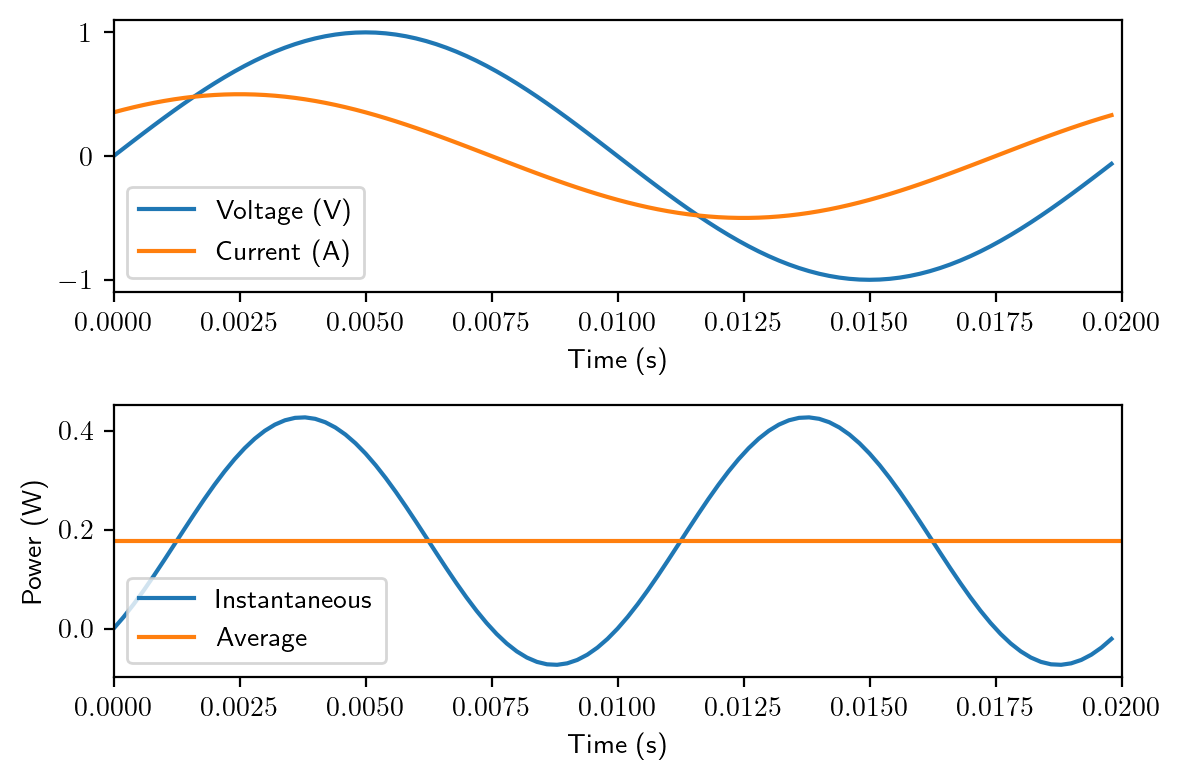

In [12]:
%reset -f
import numpy as np

# 50 Hz, 1 V, 0.5 A, theta_v = 0, theta_i = pi/4
f = 50.0
T = 1/f
V_m = 1
I_m = 0.5
theta_v = 0
theta_i = np.pi/4

omega = 2*np.pi*f
t = np.arange(0, T, T/100)
v_t = V_m*np.sin(omega*t+theta_v)
i_t = I_m*np.sin(omega*t+theta_i)

p_inst = v_t*i_t
p_av   = np.average(p_inst)

import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6 , 4]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

plt.subplot(2,1,1)
plt.plot(t, v_t, label='Voltage (V)')
plt.plot(t, i_t, label='Current (A)')
plt.xlabel('Time (s)')
plt.xlim([0, 0.02])
plt.legend()

plt.subplot(2,1,2)
plt.plot(t, p_inst, label='Instantaneous')
plt.plot([0,T], [p_av, p_av], label='Average')
plt.ylabel('Power (W)')
plt.xlabel('Time (s)')
plt.xlim([0, 0.02])
plt.legend()
plt.tight_layout()
plt.show()

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide30.PNG" align="left" width="62%">

The definition of instantaneous power and average power aforementioned can be simplified by using the newly defined phasor.

The voltage and current phasors of the previous example are given by

$$
\mathbf{V} = V\angle \theta_v~\mathrm{V} \\
\mathbf{I} = I\angle \theta_i~\mathrm{A}
$$

where $V=V_m/\sqrt{2}$ and $I=I_m/\sqrt{2}$ are the rms values.

Let us define a new quantity called **Apparent Power**, denoted as 

$$
|\mathbf{S}|=VI,
$$ 

which shows the power that appears to be in an ac circuit. This definition of apparent power is handy since it gives a feel for the size and power handling capability of electrical equipment. Take for example a capacitor, although the capacitor is not delivering any real power it must still be rated for the applied voltage as well as for the current.

Then the average power becomes

$$
P=VI\cos(\theta_v-\theta_i)=|\mathbf{S}|\cos(\theta_v-\theta_i).
$$

which is actually the apparent power multiplied by a factor that depends on the phase shift between the current and the voltage. This phase shift is called **Power Factor Angle**, and the factor is called **Power Factor**, denoted by pf:

$$
\mathrm{pf} = \cos(\theta_v-\theta_i).
$$

Then the average power, or the **Real Power**, is 

$$
P = |\mathbf{S}|\mathrm{pf}.
$$

Now let's define the new term **Complex Power** in Volt-Ampere [VA] as 

$$
\begin{align}
\mathbf{S} &=VI\angle(\theta_v-\theta_i) \\
           &=VI\left[\cos(\theta_v-\theta_i)+j\sin(\theta_v-\theta_i)\right ].
\end{align}
$$ 

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide31.PNG" align="left" width="62%">

Here the symbol* means the conjugate operator. So a complex number multiplied by the conjugate of the other complex number gives a third complex number, the amplitude of which is the product of the former two, but the phase is the phase difference between them.

As we can see, the real part of the complex number gives the average power $P$ in watt[W], which is also called real power. 
```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide32.PNG" align="left" width="62%">

The imaginary part is called **Reactive Power**, denoted by $Q$. As you can see, the basic unit of $Q$ is also [VA], but to avoid confusion with that of $\mathbf{S}$, the Romanian electrical engineer [Constantin Budeanu](https://en.wikipedia.org/wiki/Constantin_Budeanu) suggested a new unit [var] which stands for Volt-Amp`ere-reactive. Sometimes people also use [Var], [VAR] or even [VARs] for the unit of reactive power.

By comparing it to the power factor, the reactive power factor rf can also be defined as the sin of the phase difference.

Then we can write the complex power in the form of $P+jQ$. The reactive power physically means the power which is cycling back and forth without dissipating or creating useful work, e.g. the power consumed by a capacitor or an inductor. The energy is stored in them during one half-cycle, but will be delivered back to the rest of the circuit during the next half-cycle. The average of the power flow in one cycle is zero.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide33.PNG" align="left" width="62%">

We could use the example of a glass of beer to help us understand the complex power. $|\mathbf{S}|$ is the apparent power, which indicates the capacity of the system (the glass), even if part of the capacity is not delivering average power (liquid part of the beer) in the end. $P$ is the average power which is actually used by the load (liquid beer to be drunk by us), and $Q$ is the bubble, which takes part of the capacity, but is not delivering active energy.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide34.PNG" align="left" width="62%">

The table here summarises various load types and their power factors. As you can see, for a resistive load, the voltage and current are in phase, so $Q$ is zero. For a capacitive load, the current is leading the phase of voltage, since the imaginary part of the impedance is negative. The $Q$ of it is negative as well (recall the complex power is calculated by $\mathbf{VI}^*$, a leading current gives a negative $Q$). For inductive load, it's the other way around: current is lagging and the reactive power is positive.

Since the power factor is always a value which is either equal to or larger than 0, it's impossible to tell the type of load just by reading the power factor. That's why in practice, in addition to the power factor, we always indicate whether the power factor angle is leading (capacitive) or lagging (inductive).
```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide35.PNG" align="left" width="62%">

Let's use the example below to practice the calculation of the complex power.

Here we apply the trick below:

$$
\mathbf{II^*}=|\mathbf{I}|^2.
$$
```

````

In [13]:
import cmath
V_s = 60.0
R   = 3.0
X_L = 9.0*1j
X_C = -5.0*1j

Z_tot = R+X_L+X_C
I_tot = V_s/Z_tot

S = V_s*I_tot.conjugate()
S_R = I_tot*R*I_tot.conjugate()
S_L = I_tot*X_L*I_tot.conjugate()
S_C = I_tot*X_C*I_tot.conjugate()

print('The real power of R is {:.2f} W, the reactive power of R is {:.2f} VAR'.format(S_R.real, S_R.imag))
print('The real power of L is {:.2f} W, the reactive power of L is {:.2f} VAR'.format(S_L.real, S_L.imag))
print('The real power of C is {:.2f} W, the reactive power of C is {:.2f} VAR'.format(S_C.real, S_C.imag))

The real power of R is 432.00 W, the reactive power of R is 0.00 VAR
The real power of L is 0.00 W, the reactive power of L is 1296.00 VAR
The real power of C is -0.00 W, the reactive power of C is -720.00 VAR


`````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide36.PNG" align="left" width="62%">

Although reactive power does not contribute to average power used by load, it does increase the current flowing in the transmission lines, and occupies the capacity of the electrical system, which will incur real costs to provide necessary infrastructures for nothing in return.

When a large appliance or industrial process operates with a power factor of
0.5 it implies that the utility must supply two times more current than that really
necessary. The utility (company that is engaged in the generation, transmission, and
distribution of electricity for sale) therefore has to invest in upgrading the transmission
and distribution system to be able to deliver all the current to the customer. Most
utilities introduced another charge for large costumers to recuperate some of these
costs. This charge, sometimes called the network access charge or demand charge,
takes several forms. The simplest and most common charge is a cost levied per peak
demand during the billing period.

Most of the electrical equipment we use today is inductive, which means it brings an overall lagging power factor, and positive reactive power. It is then
possible to improve the power factor by including an inductive element in parallel
with the offending equipment, or at the incoming connection point, which is called *Power Factor Correction*.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
<img src="./lec3/Slide37.PNG" align="left" width="62%">

The photo here shows an example of power factor correction using capacitors. 
We know the voltage is 480 V in rms, and the frequency is 60 Hz. It's asking for the reactive power before the pf correction and the required capacitance to make a perfect pf correction.
Please work it out yourself and click below to check the solution.

Here we use the trick as follow, the reactive power factor 

$$
\begin{align}
rf &= \sin(\Delta\theta) \\
   &= \pm \sqrt{1-cos^2(\Delta\theta)} \\
   &= \pm \sqrt{1-pf^2}
\end{align}
$$

The +/- sign is chosen based on whether the power factor is lagging (+) or leading (-).
```

````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

```{admonition} Click here for solutions.
:class: tip, dropdown

<img src="./lec3/Slide38.PNG" align="left" width="62%">

<img src="./lec3/Slide39.PNG" align="left" width="62%">

```

````
`````

In [14]:
V_s = 480.0
P   = 100.0e3
pf  = 0.7
f   = 60

S   = P/pf*(0.7+cmath.sqrt(1-0.7**2)*1j) # lagging power factor means positive rf or Q
Q   = S.imag

Q_c = -1j*Q  # compensate for Q, so the sign is reversed
X_c = (V_s**2/Q_c).conjugate() # VI* = V(V/X)* = VV*/X* = |V|^2/X*

C   = 1/(2*cmath.pi*f*1j*X_c) # X_c = 1/(j2*pi*f*C)

print('The Q when the capacitor is not in the circuit is {:.3f} kVAR'.format(Q/1000))
print('The value of capacitor needed is {:.3f} uF'.format(C.real*1e6))

The Q when the capacitor is not in the circuit is 102.020 kVAR
The value of capacitor needed is 1174.555 uF


`````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec3/Slide40.PNG" align="left" width="62%">

This is another example for you to practice. Now the voltage is 220 V, the frequency is 50 Hz.
```
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
```{admonition} Click here for solutions.
:class: tip, dropdown

<img src="./lec3/Slide41.PNG" align="left" width="62%">

```
````

`````

In [15]:
V_s = 220.0
P   = 45.0e3
pf  = 0.65
f   = 50

S   = P/pf*(pf+cmath.sqrt(1-pf**2)*1j) # lagging power factor means positive rf or Q
Q   = S.imag

# correct to 0.9 lagging
pf  = 0.9
S_new = P/pf*(pf+cmath.sqrt(1-pf**2)*1j) # lagging power factor means positive rf or Q
Q_c   = S_new - S
X_c = (V_s**2/Q_c).conjugate() # VI* = V(V/X)* = VV*/X* = |V|^2/X*
C   = 1/(2*cmath.pi*f*1j*X_c) # X_c = 1/(j2*pi*f*C)
print('The value of capacitor needed to reach 0.9 pf is {:.3f} uF'.format(C.real*1e6))


# correct to 1
pf  = 1
S_new = P/pf*(pf+cmath.sqrt(1-pf**2)*1j) # lagging power factor means positive rf or Q
Q_c   = S_new - S
X_c = (V_s**2/Q_c).conjugate() # VI* = V(V/X)* = VV*/X* = |V|^2/X*
C   = 1/(2*cmath.pi*f*1j*X_c) # X_c = 1/(j2*pi*f*C)
print('The value of capacitor needed to reach unity pf is {:.3f} uF'.format(C.real*1e6))

The value of capacitor needed to reach 0.9 pf is 2026.683 uF
The value of capacitor needed to reach unity pf is 3460.030 uF


```{attention}

* For an AC system, if it is not specially mentioned, the current and voltage are always given in rms values by default.

* Note whether the angles are in radians or degrees in your calculation.

* A lagging power factor gives a positive Q and a current lagging the voltage, while a leading power factor gives a negative Q and a current leading the voltage (Recall the conjugate sign in the definition of the complex power).

```